Explore a API do Keras e aprenda como utilizar os recursos explicados aqui: funções de ativação, inicialização de pesos, normalização por lote e dropout. Aplique em alguns modelos MLP para os conjuntos MNIST e Fashion MNIST. Não fique preso ao que foi mencionado na aula: pesquise sobre e utilize outras funções de ativação, inicializações, etc. O objetivo é que você ganhe familiaridade com a biblioteca e autonomia para navegar na API e implementar os recursos em seus modelos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from random import choices

# Fashion MNIST

## Importando Dataset

In [2]:
fashion_PATH = '/kaggle/input/fashionmnist/'

fashion_train = pd.read_csv(fashion_PATH+'fashion-mnist_train.csv')

In [3]:
X, y = fashion_train.iloc[:,1:].values/255, fashion_train.iloc[:,0].values

In [4]:
label = {
0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'
}

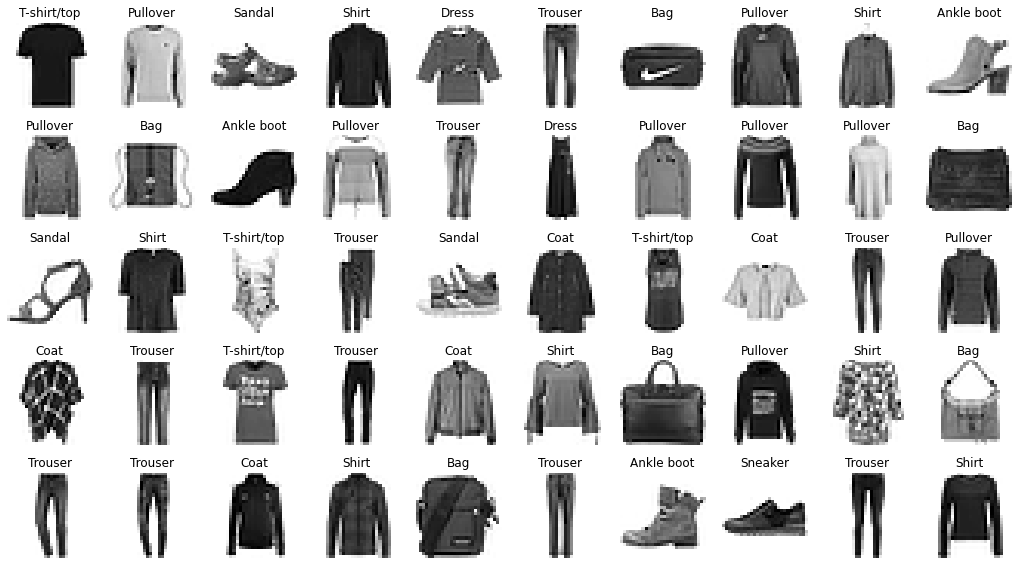

In [5]:
N_images = 50

# localização dos exemplos na matriz de dados 
rows = choices(range(0, 60000), k=N_images)

# selecionando os dígitos, já no formato de matriz
digitos = [X[i].reshape(28,28) for i in rows]
label_value = y[rows]

# criando figura do matplotlib
fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(18,10))

# plotando!
for i in range(len(rows)):
    j = int(i/10)
    k = i - j*10
    ax[j, k].imshow(digitos[i], cmap = plt.cm.binary, interpolation="nearest")
    ax[j, k].set_title(label[label_value[i]])
    ax[j, k].axis('off')

### Funcões Auxiliares

In [6]:
def compare_confusion_matriz(modelo, X_treino, X_validacao, y_treino, y_validacao):
    
    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    
    if isinstance(m, keras.models.Sequential):
        y_validacao_pred = np.argmax(y_validacao_pred, axis=1)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    
    confusao_val = confusion_matrix(y_validacao, y_validacao_pred)
    confusao_tr = confusion_matrix(y_treino, y_train_pred)
    
    fig, ax = plt.subplots(1, 2,figsize=(20,10))
    sns.heatmap(pd.DataFrame(confusao_val).rename(label, axis=1).rename(label, axis=0), ax=ax[0], cbar=False, annot=True)
    ax[0].set_title('Matriz de confusão validação', size=20)
    ax[0].set_yticklabels(ax[0].get_xticklabels(), rotation=0, size=15)
    ax[0].set_xticklabels(ax[0].get_yticklabels(), rotation=90, size=15)
    sns.heatmap(pd.DataFrame(confusao_tr), ax=ax[1], cbar=False, annot=True)
    ax[1].set_title('Matriz de confusão treino', size=20)
    ax[1].set_yticklabels(ax[1].get_xticklabels(), rotation=0, size=15)
    ax[1].set_xticklabels(ax[1].get_yticklabels(), rotation=0, size=15)
    plt.show()

In [7]:
def acuracia(modelo, X_treino, X_validacao, y_treino, y_validacao):

    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    
    if isinstance(m, keras.models.Sequential):
        y_validacao_pred = np.argmax(y_validacao_pred, axis=1)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    
    acc_tr = accuracy_score(y_treino, y_train_pred)
    acc_val = accuracy_score(y_validacao, y_validacao_pred)

    return {'Acurácia do treino': acc_tr, 'Acurácia da validação': acc_val}

In [8]:
def plot_erros(model, X, target):

    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    
    predicao = pd.DataFrame(data={'predicao':y_pred, 'target':target})
    predicao_erros = predicao[predicao.predicao != predicao.target]
    
    N_images = 50

    # localização dos exemplos na matriz de dados 
    rows = predicao_erros.index[:N_images]

    # selecionando os dígitos, já no formato de matriz
    digitos = [X[i].reshape(28,28) for i in rows]
    label_value = predicao.loc[rows, 'target']
    label_errors = predicao.loc[rows, 'predicao']

    # criando figura do matplotlib
    fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(30,10))

    # plotando!
    for i in range(len(rows)):
        j = int(i/10)
        k = i - j*10
        ax[j, k].imshow(digitos[i], cmap = plt.cm.binary, interpolation="nearest")
        ax[j, k].set_title(f'{label[label_value.iloc[i]]} confused {label[label_errors.iloc[i]]}')
        ax[j, k].axis('off')

## Keras

In [9]:
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
m = keras.models.Sequential()

m.add(keras.layers.Dense(200, input_shape = (784,), activation="relu"))
m.add(keras.layers.Dense(10, activation="softmax"))

m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
%%time 

H = m.fit(X_treino, y_treino, 
          batch_size = 200, epochs = 10, 
          validation_data = (X_validacao, y_validacao));

Epoch 1/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5970 - accuracy: 0.7966 - val_loss: 0.4487 - val_accuracy: 0.8455
Epoch 2/10
240/240 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.8499 - val_loss: 0.4261 - val_accuracy: 0.8442
Epoch 3/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3868 - accuracy: 0.8632 - val_loss: 0.3813 - val_accuracy: 0.8647
Epoch 4/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3636 - accuracy: 0.8710 - val_loss: 0.3698 - val_accuracy: 0.8687
Epoch 5/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8808 - val_loss: 0.3528 - val_accuracy: 0.8752
Epoch 6/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8836 - val_loss: 0.3554 - val_accuracy: 0.8683
Epoch 7/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3090 - accuracy: 0.8900 - val_loss: 0.3292 - val_accuracy: 0.8796
Epoch 

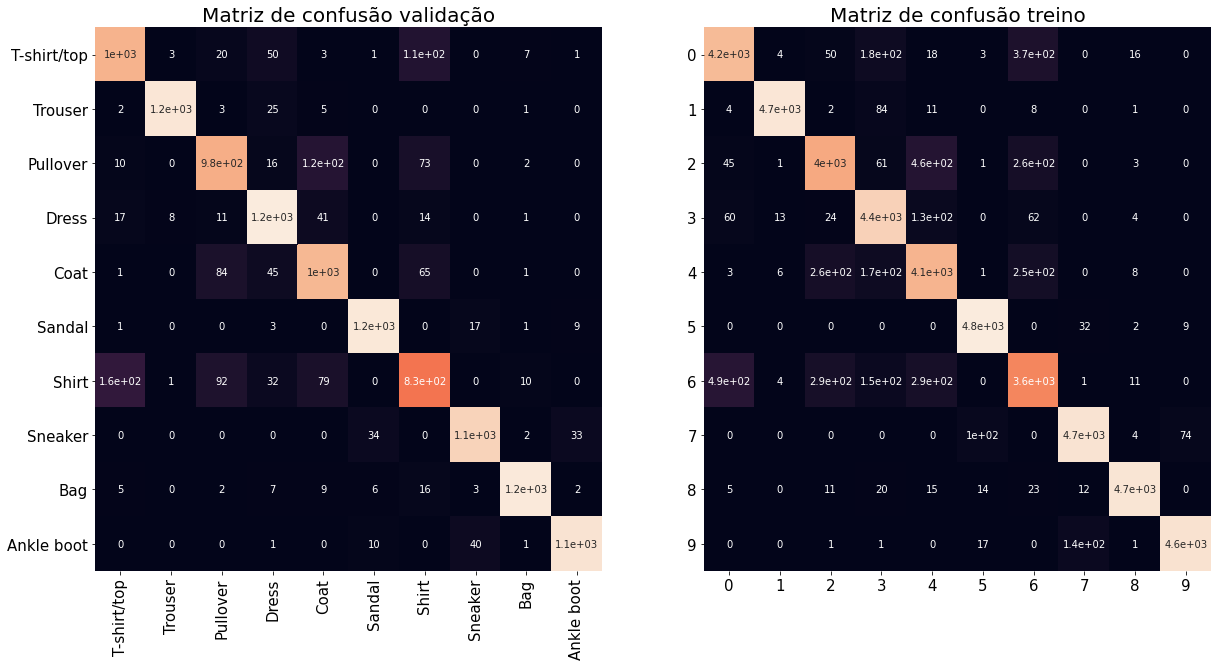

In [12]:
compare_confusion_matriz(m, X_treino, X_validacao, y_treino, y_validacao)

In [13]:
acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

{'Acurácia do treino': 0.9104791666666666, 'Acurácia da validação': 0.89125}

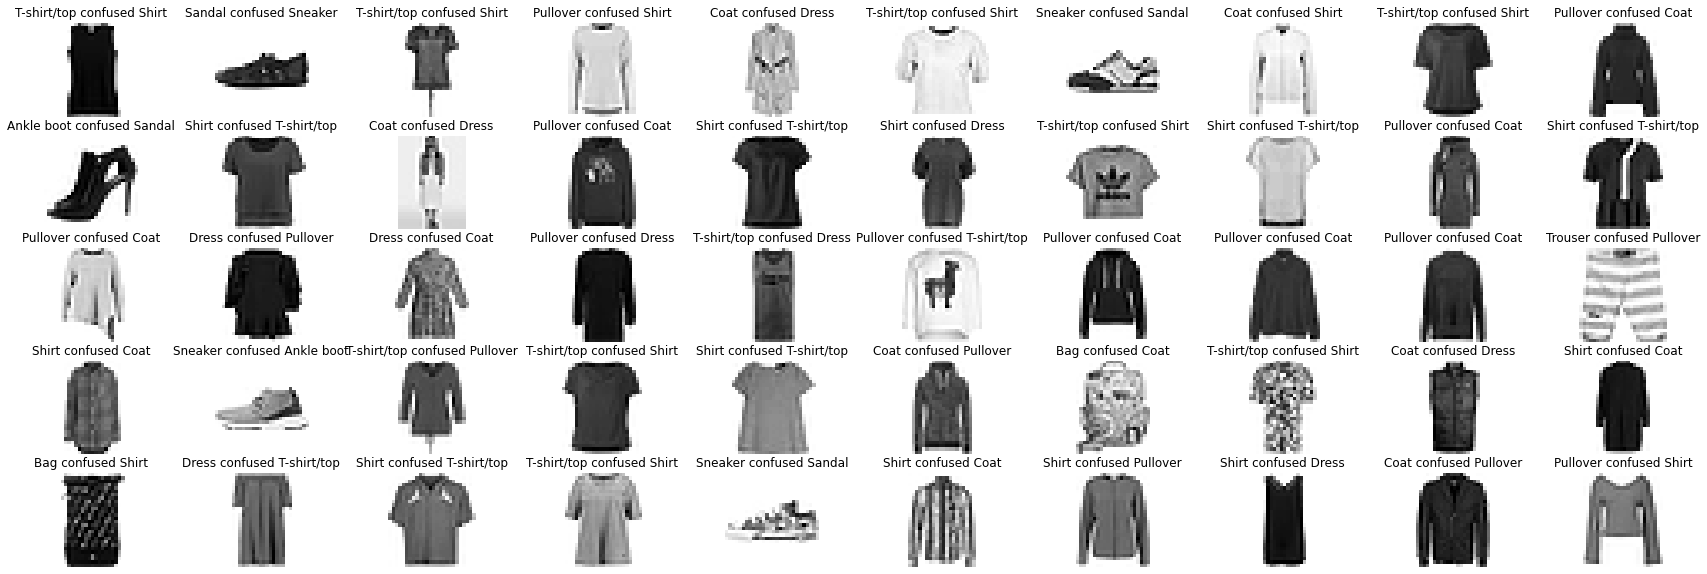

In [14]:
plot_erros(m, X_validacao, y_validacao)

Existem muitas confusões perfeitamente aceitáveis como Senaker com Sandal, T-shirt com shirt. Porem tem alguns erros mais sérios como bag com shirt, bag com coat o programa tem uma dificuldade particular em classificar shirt.

## Otimização do modelo

### Número de neurônios na camada oculta

In [15]:
%%time 

neurons_list = [10, 20, 40, 100, 150, 200, 300, 400, 600, 1000]
acuracia_dict = dict()

for value in neurons_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(value, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
240/240 [==============================] - 1s 2ms/step - loss: 1.0700 - accuracy: 0.6506 - val_loss: 0.6549 - val_accuracy: 0.7928
Epoch 2/20
240/240 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.8063 - val_loss: 0.5472 - val_accuracy: 0.8148
Epoch 3/20
240/240 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.8262 - val_loss: 0.5046 - val_accuracy: 0.8280
Epoch 4/20
240/240 [==============================] - 1s 2ms/step - loss: 0.4877 - accuracy: 0.8348 - val_loss: 0.4799 - val_accuracy: 0.8360
Epoch 5/20
240/240 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8416 - val_loss: 0.4696 - val_accuracy: 0.8406
Epoch 6/20
240/240 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8451 - val_loss: 0.4609 - val_accuracy: 0.8392
Epoch 7/20
240/240 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8479 - val_loss: 0.4501 - val_accuracy: 0.8443
Epoch 

240/240 [==============================] - 1s 2ms/step - loss: 0.3044 - accuracy: 0.8922 - val_loss: 0.3468 - val_accuracy: 0.8769
Epoch 19/20
240/240 [==============================] - 1s 2ms/step - loss: 0.2992 - accuracy: 0.8940 - val_loss: 0.3617 - val_accuracy: 0.8710
Epoch 20/20
240/240 [==============================] - 1s 2ms/step - loss: 0.2971 - accuracy: 0.8937 - val_loss: 0.3481 - val_accuracy: 0.8761
Epoch 1/20
240/240 [==============================] - 1s 3ms/step - loss: 0.6433 - accuracy: 0.7827 - val_loss: 0.4843 - val_accuracy: 0.8388
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 0.4491 - accuracy: 0.8459 - val_loss: 0.4348 - val_accuracy: 0.8440
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8584 - val_loss: 0.3937 - val_accuracy: 0.8597
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.3825 - accuracy: 0.8658 - val_loss: 0.4005 - val_accuracy: 0.8580
Epoch 5/20
240/

240/240 [==============================] - 1s 3ms/step - loss: 0.2371 - accuracy: 0.9137 - val_loss: 0.3120 - val_accuracy: 0.8854
Epoch 16/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2271 - accuracy: 0.9174 - val_loss: 0.3584 - val_accuracy: 0.8714
Epoch 17/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9185 - val_loss: 0.3125 - val_accuracy: 0.8878
Epoch 18/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2145 - accuracy: 0.9224 - val_loss: 0.3097 - val_accuracy: 0.8925
Epoch 19/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2102 - accuracy: 0.9241 - val_loss: 0.3208 - val_accuracy: 0.8849
Epoch 20/20
240/240 [==============================] - 1s 3ms/step - loss: 0.2035 - accuracy: 0.9267 - val_loss: 0.3211 - val_accuracy: 0.8854
Epoch 1/20
240/240 [==============================] - 1s 5ms/step - loss: 0.5847 - accuracy: 0.7994 - val_loss: 0.4562 - val_accuracy: 0.8374
Epoch 2/20
2

240/240 [==============================] - 2s 7ms/step - loss: 0.2278 - accuracy: 0.9157 - val_loss: 0.3306 - val_accuracy: 0.8837
Epoch 13/20
240/240 [==============================] - 2s 7ms/step - loss: 0.2175 - accuracy: 0.9206 - val_loss: 0.3276 - val_accuracy: 0.8823
Epoch 14/20
240/240 [==============================] - 2s 7ms/step - loss: 0.2075 - accuracy: 0.9239 - val_loss: 0.2997 - val_accuracy: 0.8953
Epoch 15/20
240/240 [==============================] - 2s 7ms/step - loss: 0.2005 - accuracy: 0.9266 - val_loss: 0.3088 - val_accuracy: 0.8914
Epoch 16/20
240/240 [==============================] - 2s 7ms/step - loss: 0.1930 - accuracy: 0.9300 - val_loss: 0.3051 - val_accuracy: 0.8918
Epoch 17/20
240/240 [==============================] - 2s 7ms/step - loss: 0.1855 - accuracy: 0.9316 - val_loss: 0.3009 - val_accuracy: 0.8928
Epoch 18/20
240/240 [==============================] - 2s 7ms/step - loss: 0.1813 - accuracy: 0.9329 - val_loss: 0.3029 - val_accuracy: 0.8923
Epoch 19/20

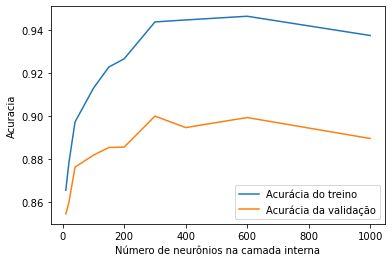

In [16]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Número de neurônios na camada interna')
plt.ylabel('Acuracia')
plt.show()

Parece que 400 neurônios apresentam um valor satisfatório (há efeitos na aleatóriedade do programa na predição e certas execuções resultam em uma melhora pequena. É conservado o valor que retorna mais frequentemente bons resultados)

### Adição de mais uma camada de neurônios

In [17]:
%%time 

neurons_list = [10, 20, 40, 100, 200]
acuracia_dict = dict()

for value in neurons_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(value, input_shape = (400,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
240/240 [==============================] - 1s 6ms/step - loss: 0.6813 - accuracy: 0.7765 - val_loss: 0.4571 - val_accuracy: 0.8432
Epoch 2/20
240/240 [==============================] - 1s 5ms/step - loss: 0.4273 - accuracy: 0.8516 - val_loss: 0.4287 - val_accuracy: 0.8478
Epoch 3/20
240/240 [==============================] - 1s 5ms/step - loss: 0.3863 - accuracy: 0.8645 - val_loss: 0.3664 - val_accuracy: 0.8701
Epoch 4/20
240/240 [==============================] - 1s 5ms/step - loss: 0.3543 - accuracy: 0.8737 - val_loss: 0.3518 - val_accuracy: 0.8743
Epoch 5/20
240/240 [==============================] - 1s 5ms/step - loss: 0.3310 - accuracy: 0.8817 - val_loss: 0.3532 - val_accuracy: 0.8712
Epoch 6/20
240/240 [==============================] - 1s 5ms/step - loss: 0.3165 - accuracy: 0.8865 - val_loss: 0.3483 - val_accuracy: 0.8757
Epoch 7/20
240/240 [==============================] - 1s 6ms/step - loss: 0.2993 - accuracy: 0.8918 - val_loss: 0.3264 - val_accuracy: 0.8837
Epoch 

240/240 [==============================] - 1s 6ms/step - loss: 0.1851 - accuracy: 0.9318 - val_loss: 0.3163 - val_accuracy: 0.8908
Epoch 19/20
240/240 [==============================] - 1s 6ms/step - loss: 0.1830 - accuracy: 0.9315 - val_loss: 0.3059 - val_accuracy: 0.8913
Epoch 20/20
240/240 [==============================] - 1s 6ms/step - loss: 0.1724 - accuracy: 0.9358 - val_loss: 0.3060 - val_accuracy: 0.8946
Epoch 1/20
240/240 [==============================] - 2s 7ms/step - loss: 0.5619 - accuracy: 0.8065 - val_loss: 0.4387 - val_accuracy: 0.8418
Epoch 2/20
240/240 [==============================] - 1s 6ms/step - loss: 0.3948 - accuracy: 0.8591 - val_loss: 0.3912 - val_accuracy: 0.8593
Epoch 3/20
240/240 [==============================] - 1s 6ms/step - loss: 0.3496 - accuracy: 0.8754 - val_loss: 0.3773 - val_accuracy: 0.8614
Epoch 4/20
240/240 [==============================] - 1s 6ms/step - loss: 0.3223 - accuracy: 0.8822 - val_loss: 0.3597 - val_accuracy: 0.8701
Epoch 5/20
240/

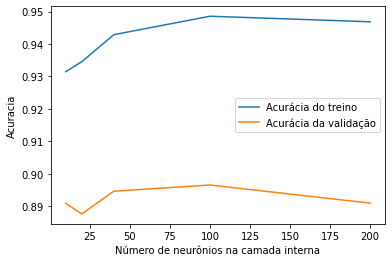

In [18]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Número de neurônios na camada interna')
plt.ylabel('Acuracia')
plt.show()

A adição de uma novaca camada não afetou de forma significativa a predição.

### Batch Size

In [19]:
%%time 

batch_size_list = [50, 70, 100, 200, 300, 400]
acuracia_dict = dict()

for value in batch_size_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = value, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
960/960 [==============================] - 3s 3ms/step - loss: 0.5020 - accuracy: 0.8222 - val_loss: 0.4010 - val_accuracy: 0.8551
Epoch 2/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3793 - accuracy: 0.8634 - val_loss: 0.3596 - val_accuracy: 0.8694
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3401 - accuracy: 0.8758 - val_loss: 0.3429 - val_accuracy: 0.8747
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3125 - accuracy: 0.8856 - val_loss: 0.3412 - val_accuracy: 0.8768
Epoch 5/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2935 - accuracy: 0.8919 - val_loss: 0.3217 - val_accuracy: 0.8835
Epoch 6/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2795 - accuracy: 0.8966 - val_loss: 0.3063 - val_accuracy: 0.8902
Epoch 7/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2655 - accuracy: 0.9011 - val_loss: 0.3413 - val_accuracy: 0.8802
Epoch 

480/480 [==============================] - 2s 4ms/step - loss: 0.1770 - accuracy: 0.9347 - val_loss: 0.3209 - val_accuracy: 0.8930
Epoch 19/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1740 - accuracy: 0.9343 - val_loss: 0.3130 - val_accuracy: 0.8931
Epoch 20/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1659 - accuracy: 0.9397 - val_loss: 0.3251 - val_accuracy: 0.8917
Epoch 1/20
240/240 [==============================] - 1s 6ms/step - loss: 0.5583 - accuracy: 0.8088 - val_loss: 0.4358 - val_accuracy: 0.8459
Epoch 2/20
240/240 [==============================] - 1s 5ms/step - loss: 0.4123 - accuracy: 0.8542 - val_loss: 0.4149 - val_accuracy: 0.8520
Epoch 3/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3741 - accuracy: 0.8684 - val_loss: 0.3823 - val_accuracy: 0.8597
Epoch 4/20
240/240 [==============================] - 2s 8ms/step - loss: 0.3385 - accuracy: 0.8790 - val_loss: 0.3480 - val_accuracy: 0.8753
Epoch 5/20
240/

120/120 [==============================] - 1s 8ms/step - loss: 0.2381 - accuracy: 0.9142 - val_loss: 0.3083 - val_accuracy: 0.8904
Epoch 16/20
120/120 [==============================] - 1s 8ms/step - loss: 0.2245 - accuracy: 0.9194 - val_loss: 0.3055 - val_accuracy: 0.8917
Epoch 17/20
120/120 [==============================] - 1s 8ms/step - loss: 0.2169 - accuracy: 0.9231 - val_loss: 0.2951 - val_accuracy: 0.8947
Epoch 18/20
120/120 [==============================] - 1s 8ms/step - loss: 0.2136 - accuracy: 0.9225 - val_loss: 0.3002 - val_accuracy: 0.8931
Epoch 19/20
120/120 [==============================] - 1s 8ms/step - loss: 0.2032 - accuracy: 0.9274 - val_loss: 0.3072 - val_accuracy: 0.8931
Epoch 20/20
120/120 [==============================] - 1s 8ms/step - loss: 0.1967 - accuracy: 0.9290 - val_loss: 0.3050 - val_accuracy: 0.8907
CPU times: user 8min 11s, sys: 42 s, total: 8min 53s
Wall time: 3min 36s


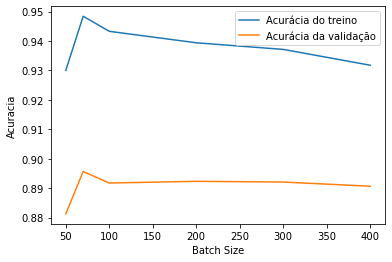

In [20]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Batch Size')
plt.ylabel('Acuracia')
plt.show()

Batch size de 300 apresentou um bom resultado e um tempo de execução baixo.

### Funções de ativação

In [21]:
activation_list = ['relu', 'selu', 'tanh', 'sigmoid']
acuracia_dict = dict()

for activation in activation_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation=activation))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 300, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[activation] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
160/160 [==============================] - 1s 7ms/step - loss: 0.5972 - accuracy: 0.7929 - val_loss: 0.4614 - val_accuracy: 0.8367
Epoch 2/20
160/160 [==============================] - 1s 7ms/step - loss: 0.4222 - accuracy: 0.8520 - val_loss: 0.4015 - val_accuracy: 0.8608
Epoch 3/20
160/160 [==============================] - 1s 7ms/step - loss: 0.3810 - accuracy: 0.8643 - val_loss: 0.3759 - val_accuracy: 0.8638
Epoch 4/20
160/160 [==============================] - 1s 7ms/step - loss: 0.3520 - accuracy: 0.8736 - val_loss: 0.3481 - val_accuracy: 0.8762
Epoch 5/20
160/160 [==============================] - 1s 6ms/step - loss: 0.3283 - accuracy: 0.8825 - val_loss: 0.3459 - val_accuracy: 0.8764
Epoch 6/20
160/160 [==============================] - 1s 7ms/step - loss: 0.3134 - accuracy: 0.8865 - val_loss: 0.3422 - val_accuracy: 0.8751
Epoch 7/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2964 - accuracy: 0.8928 - val_loss: 0.3316 - val_accuracy: 0.8808
Epoch 

160/160 [==============================] - 1s 7ms/step - loss: 0.2273 - accuracy: 0.9159 - val_loss: 0.3034 - val_accuracy: 0.8903
Epoch 19/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2236 - accuracy: 0.9180 - val_loss: 0.3083 - val_accuracy: 0.8882
Epoch 20/20
160/160 [==============================] - 1s 6ms/step - loss: 0.2168 - accuracy: 0.9199 - val_loss: 0.3001 - val_accuracy: 0.8931
Epoch 1/20
160/160 [==============================] - 1s 8ms/step - loss: 0.7570 - accuracy: 0.7509 - val_loss: 0.5216 - val_accuracy: 0.8191
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.4896 - accuracy: 0.8289 - val_loss: 0.4579 - val_accuracy: 0.8357
Epoch 3/20
160/160 [==============================] - 1s 7ms/step - loss: 0.4415 - accuracy: 0.8443 - val_loss: 0.4382 - val_accuracy: 0.8392
Epoch 4/20
160/160 [==============================] - 1s 6ms/step - loss: 0.4159 - accuracy: 0.8524 - val_loss: 0.4109 - val_accuracy: 0.8535
Epoch 5/20
160/

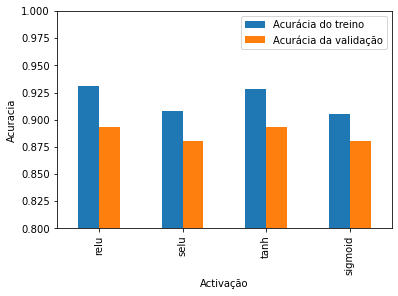

In [22]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Activação')
plt.ylabel('Acuracia')
plt.ylim(0.80, 1)
plt.show()

A função de ativação relu apresentou o melhor resultado.

### Optimizer

In [23]:
optimizer_list = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
acuracia_dict = dict()

for optimizer in optimizer_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation='relu'))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 300, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[optimizer] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
160/160 [==============================] - 1s 7ms/step - loss: 1.3627 - accuracy: 0.6019 - val_loss: 0.9805 - val_accuracy: 0.6923
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.8736 - accuracy: 0.7193 - val_loss: 0.7991 - val_accuracy: 0.7409
Epoch 3/20
160/160 [==============================] - 1s 6ms/step - loss: 0.7542 - accuracy: 0.7571 - val_loss: 0.7151 - val_accuracy: 0.7665
Epoch 4/20
160/160 [==============================] - 1s 6ms/step - loss: 0.6904 - accuracy: 0.7779 - val_loss: 0.6653 - val_accuracy: 0.7842
Epoch 5/20
160/160 [==============================] - 1s 6ms/step - loss: 0.6487 - accuracy: 0.7899 - val_loss: 0.6302 - val_accuracy: 0.7957
Epoch 6/20
160/160 [==============================] - 1s 6ms/step - loss: 0.6185 - accuracy: 0.7993 - val_loss: 0.6055 - val_accuracy: 0.8037
Epoch 7/20
160/160 [==============================] - 1s 6ms/step - loss: 0.5951 - accuracy: 0.8059 - val_loss: 0.5847 - val_accuracy: 0.8076
Epoch 

160/160 [==============================] - 1s 6ms/step - loss: 0.2039 - accuracy: 0.9253 - val_loss: 0.3006 - val_accuracy: 0.8928
Epoch 19/20
160/160 [==============================] - 1s 7ms/step - loss: 0.1984 - accuracy: 0.9287 - val_loss: 0.3081 - val_accuracy: 0.8913
Epoch 20/20
160/160 [==============================] - 1s 6ms/step - loss: 0.1924 - accuracy: 0.9312 - val_loss: 0.3000 - val_accuracy: 0.8932
Epoch 1/20
160/160 [==============================] - 2s 11ms/step - loss: 2.2416 - accuracy: 0.2087 - val_loss: 2.1783 - val_accuracy: 0.2402
Epoch 2/20
160/160 [==============================] - 1s 8ms/step - loss: 2.1238 - accuracy: 0.2837 - val_loss: 2.0652 - val_accuracy: 0.3217
Epoch 3/20
160/160 [==============================] - 1s 9ms/step - loss: 2.0144 - accuracy: 0.3585 - val_loss: 1.9597 - val_accuracy: 0.3873
Epoch 4/20
160/160 [==============================] - 2s 10ms/step - loss: 1.9118 - accuracy: 0.4195 - val_loss: 1.8603 - val_accuracy: 0.4433
Epoch 5/20
16

160/160 [==============================] - 1s 7ms/step - loss: 0.2889 - accuracy: 0.8978 - val_loss: 0.3297 - val_accuracy: 0.8832
Epoch 16/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2844 - accuracy: 0.8989 - val_loss: 0.3300 - val_accuracy: 0.8828
Epoch 17/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2810 - accuracy: 0.9003 - val_loss: 0.3268 - val_accuracy: 0.8839
Epoch 18/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2727 - accuracy: 0.9028 - val_loss: 0.3310 - val_accuracy: 0.8805
Epoch 19/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2685 - accuracy: 0.9051 - val_loss: 0.3200 - val_accuracy: 0.8856
Epoch 20/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2642 - accuracy: 0.9051 - val_loss: 0.3218 - val_accuracy: 0.8867
Epoch 1/20
160/160 [==============================] - 1s 9ms/step - loss: 0.6513 - accuracy: 0.7806 - val_loss: 0.4561 - val_accuracy: 0.8416
Epoch 2/20
1

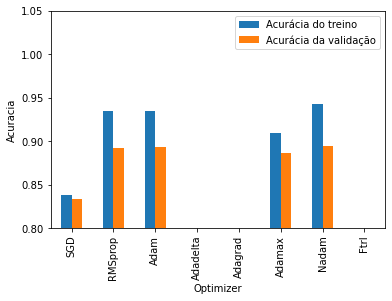

In [24]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Optimizer')
plt.ylabel('Acuracia')
plt.ylim(0.80, 1.05)
plt.show()

As otimizações Adamax e Nadam apresentaram o mesmo resultado.

## Epochs

In [29]:
epochs_list = [5, 7, 10, 12, 15, 20, 30, 40]
acuracia_dict = dict()

for epochs in epochs_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(400, input_shape = (784,), activation='relu'))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 300, epochs = epochs, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[epochs] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/5
160/160 [==============================] - 1s 8ms/step - loss: 0.5918 - accuracy: 0.7979 - val_loss: 0.4482 - val_accuracy: 0.8405
Epoch 2/5
160/160 [==============================] - 1s 7ms/step - loss: 0.4257 - accuracy: 0.8507 - val_loss: 0.4165 - val_accuracy: 0.8562
Epoch 3/5
160/160 [==============================] - 1s 7ms/step - loss: 0.3822 - accuracy: 0.8637 - val_loss: 0.3858 - val_accuracy: 0.8646
Epoch 4/5
160/160 [==============================] - 1s 7ms/step - loss: 0.3529 - accuracy: 0.8748 - val_loss: 0.3683 - val_accuracy: 0.8688
Epoch 5/5
160/160 [==============================] - 1s 7ms/step - loss: 0.3324 - accuracy: 0.8815 - val_loss: 0.3391 - val_accuracy: 0.8780
Epoch 1/7
160/160 [==============================] - 1s 8ms/step - loss: 0.5887 - accuracy: 0.7958 - val_loss: 0.4663 - val_accuracy: 0.8350
Epoch 2/7
160/160 [==============================] - 1s 7ms/step - loss: 0.4255 - accuracy: 0.8524 - val_loss: 0.4024 - val_accuracy: 0.8597
Epoch 3/7
160

Epoch 10/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2621 - accuracy: 0.9038 - val_loss: 0.3091 - val_accuracy: 0.8879
Epoch 11/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2492 - accuracy: 0.9085 - val_loss: 0.3094 - val_accuracy: 0.8885
Epoch 12/20
160/160 [==============================] - 1s 6ms/step - loss: 0.2426 - accuracy: 0.9116 - val_loss: 0.3191 - val_accuracy: 0.8832
Epoch 13/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2369 - accuracy: 0.9135 - val_loss: 0.3001 - val_accuracy: 0.8917
Epoch 14/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2288 - accuracy: 0.9168 - val_loss: 0.3030 - val_accuracy: 0.8909
Epoch 15/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2209 - accuracy: 0.9195 - val_loss: 0.3003 - val_accuracy: 0.8935
Epoch 16/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2131 - accuracy: 0.9223 - val_loss: 0.2984 - val_accuracy: 0.8937

160/160 [==============================] - 1s 8ms/step - loss: 0.2118 - accuracy: 0.9223 - val_loss: 0.2970 - val_accuracy: 0.8938
Epoch 18/40
160/160 [==============================] - 1s 9ms/step - loss: 0.2027 - accuracy: 0.9264 - val_loss: 0.3081 - val_accuracy: 0.8910
Epoch 19/40
160/160 [==============================] - 1s 7ms/step - loss: 0.1960 - accuracy: 0.9294 - val_loss: 0.2969 - val_accuracy: 0.8957
Epoch 20/40
160/160 [==============================] - 1s 6ms/step - loss: 0.1901 - accuracy: 0.9319 - val_loss: 0.2963 - val_accuracy: 0.8966
Epoch 21/40
160/160 [==============================] - 1s 6ms/step - loss: 0.1856 - accuracy: 0.9324 - val_loss: 0.3098 - val_accuracy: 0.8918
Epoch 22/40
160/160 [==============================] - 1s 7ms/step - loss: 0.1826 - accuracy: 0.9335 - val_loss: 0.3191 - val_accuracy: 0.8893
Epoch 23/40
160/160 [==============================] - 1s 7ms/step - loss: 0.1728 - accuracy: 0.9372 - val_loss: 0.3234 - val_accuracy: 0.8852
Epoch 24/40

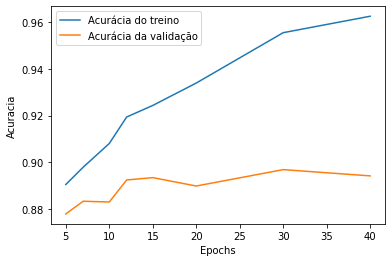

In [30]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Epochs')
plt.ylabel('Acuracia')
plt.show()

Após 12 Epochs o sobre ajuste aumenta significativamente porem o modelo parece ter estabilizado na capacidade de predição

O Keras possibilitou resultados melhores que MLPClassifier do sktlearn. Possibilitando que os modelos convergissem mais rápido e resultados mais precisos.